In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [42]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [43]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [7]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [48]:
df.isna().any()

Sqft           False
Floor          False
TotalFloor     False
Bedroom        False
Living.Room    False
Bathroom       False
Price          False
dtype: bool

In [52]:
df[df['Price']==0]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [47]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [45]:
df.groupby('Bedroom')['Price'].mean()

Bedroom
1     35549.086957
2     47131.689441
3     65030.949791
4     77745.434783
5    117000.000000
6    180000.000000
7    180000.000000
Name: Price, dtype: float64

In [46]:
df.groupby('Living.Room')['Price'].mean()

Living.Room
0     39271.428571
1     41134.923729
2     65969.903733
3    109399.900000
4    180000.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

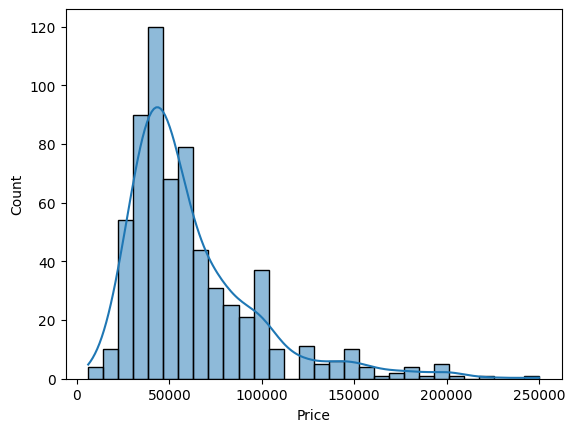

In [56]:
sns.histplot(df['Price'],kde=True)

<Axes: xlabel='Sqft', ylabel='Count'>

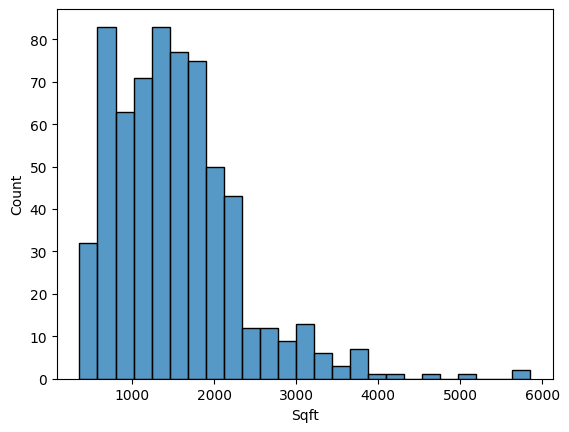

In [13]:
sns.histplot(df['Sqft'])

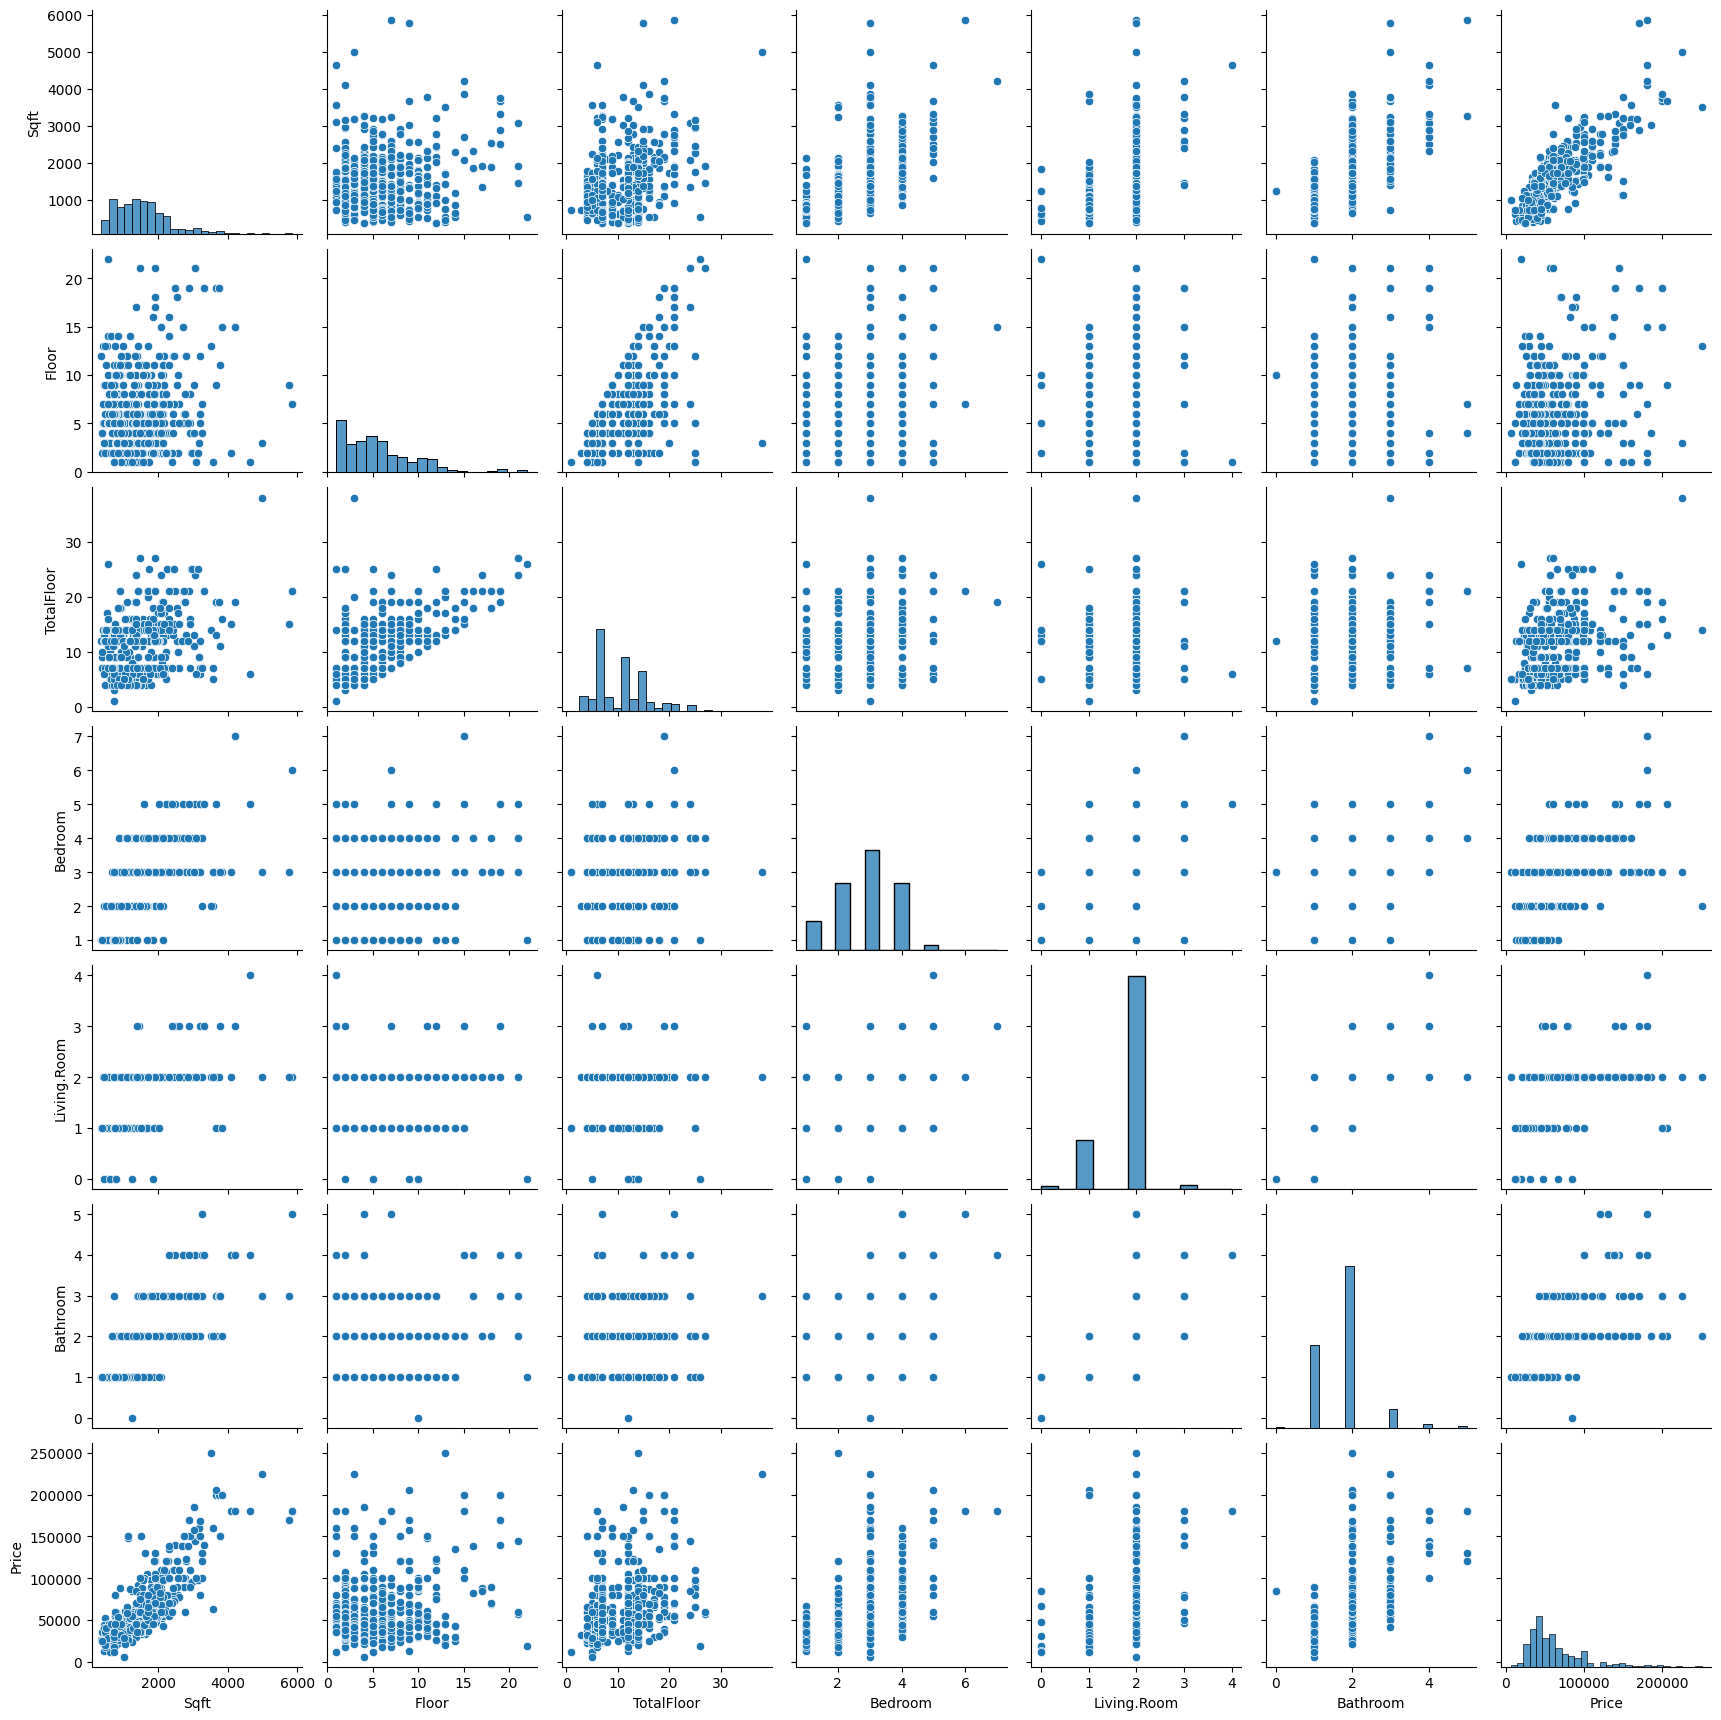

In [57]:
sns.pairplot(df)

In [63]:
x=df.iloc[:,0:6]
y=df.iloc[:,6]


In [64]:
x_train , x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((516, 6), (129, 6), (516,), (129,))

In [145]:
np.sqrt(len(x_train))

22.715633383201094

In [193]:
knnr=KNeighborsRegressor(n_neighbors=23)


In [194]:
knnr.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=23)

In [195]:
y_pred=knnr.predict(x_test)

In [196]:
mse1 = mean_squared_error(y_test,y_pred)
mse1

407842605.182002

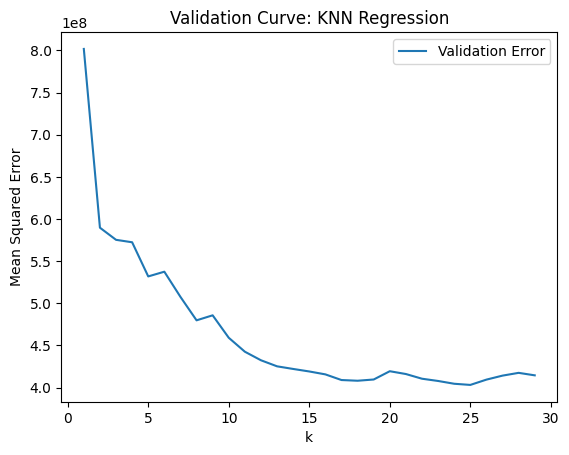

Best value of k: 25


In [186]:
k_values = range(1, 30)

val_errors = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_preds = knn.predict(x_test)
    y_mse = mean_squared_error(y_test, y_preds)
    val_errors.append(y_mse)


# Plot the validation curve
plt.plot(k_values, val_errors, label='Validation Error')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve: KNN Regression')
plt.legend()
plt.show()

# Find the best value of k
best_k = k_values[np.argmin(val_errors)]
print("Best value of k:", best_k)

In [197]:
knnr=KNeighborsRegressor(n_neighbors=25)
knnr.fit(x_train,y_train)
knnr.predict(x_test)


array([ 43520.  ,  71027.96,  34085.28,  39146.36, 109169.2 ,  39874.36,
        78799.92,  43080.  ,  61920.  ,  90839.88,  75079.96, 158880.  ,
        48171.96,  77599.92,  69679.92,  47055.48,  78759.92,  67599.92,
        47311.08,  76715.44, 151880.  ,  71027.96,  48451.  ,  62000.  ,
        33605.28,  47703.92,  32957.24,  55528.16,  71619.52,  81799.92,
        69411.52, 145973.76,  53364.68,  77679.92,  49051.  ,  78799.92,
        27887.48,  40106.36, 112569.24,  62339.4 ,  76159.96,  30875.96,
       129289.28,  62600.  ,  32925.28,  56512.6 ,  27887.48,  30875.96,
        77599.92,  62640.  ,  46831.08,  34295.92,  40106.36,  40225.24,
       121209.24,  48220.  ,  48451.  ,  47551.08,  48451.  ,  62899.4 ,
        38466.36,  62339.4 ,  41104.08,  75079.96, 123689.28,  31297.24,
        47011.04,  77679.92, 112169.24,  77959.92,  62600.  ,  75360.  ,
       131973.76,  47143.84,  33605.28,  75879.96,  31297.24,  39225.28,
        47703.92,  76755.44,  75079.96,  62600.  , 

In [198]:
y_pred=knnr.predict(x_test)


In [199]:
mse2 = mean_squared_error(y_test, y_pred)
mse2

403157612.82944506

In [200]:
mse1 , mse2

(407842605.182002, 403157612.82944506)